#### This is an implementation of perceptron learning algorithm in single layered perceptron 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
x1 = np.array([0., 0., 1., 1.], dtype = np.float32) # . is for simply say that it is a float value 
x2 = np.array([0., 1., 0., 1.], dtype = np.float32) 

y = np.array([0, 0, 0, 1], dtype = int) # For output we do not need any floating points as we are doing this for binary classification which means 0 or 1

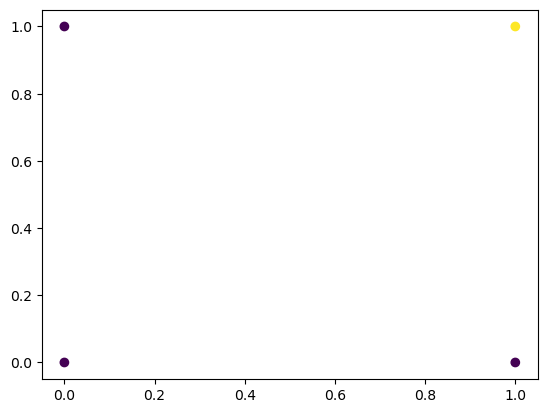

In [3]:
plt.scatter(x1, x2, c=y)


In [4]:
# Repeat the numbers from x1, x2, and y - 50 times to augment the data we have to make understand our infant model well.

x1 = np.repeat(x1, 50)
x2 = np.repeat(x2, 50)
y =  np.repeat(y, 50)

In [5]:
x1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [6]:
x1.shape

(200,)

In [7]:
x2


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [8]:
x2.shape

(200,)

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [10]:
# Now let's add some noise so that model will have the clarity that which is wrong and which is right 
x1 = x1 + np.random.rand(x1.shape[0])*0.05  # x1.shape = 200, 
x2 = x2 + np.random.rand(x2.shape[0])*0.05
# We should not add the noise as we have to map our data to exact class 

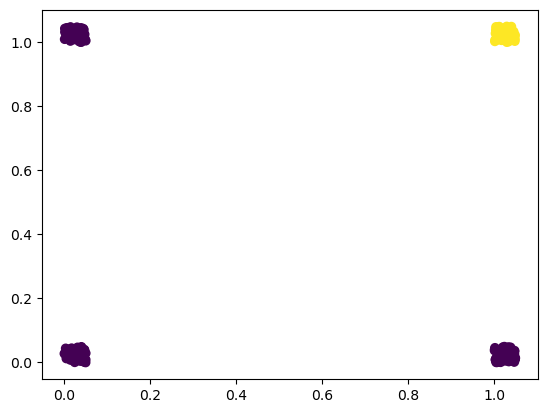

In [11]:
plt.scatter(x1, x2, c=y) 

In [12]:
# combine x1 and x2 

X = np.column_stack((x1, x2))

In [13]:
X

array([[4.77238732e-02, 7.71861103e-03],
       [4.65351787e-02, 1.26810214e-03],
       [2.30087929e-02, 2.93581522e-02],
       [1.98704633e-02, 2.40132320e-02],
       [4.58240337e-03, 1.24325104e-02],
       [3.65684668e-02, 1.52514504e-02],
       [4.96259338e-02, 2.90429901e-02],
       [1.32720548e-02, 4.08458903e-02],
       [1.25746001e-02, 2.12343192e-02],
       [1.39253568e-02, 7.92239060e-03],
       [4.67062095e-02, 3.89113726e-02],
       [2.40569783e-02, 6.16499949e-04],
       [3.37322799e-02, 2.25223907e-02],
       [1.21853908e-02, 2.32844173e-02],
       [2.37807871e-02, 2.69639940e-02],
       [4.62900479e-02, 4.00281768e-02],
       [3.62490971e-03, 3.13030149e-02],
       [4.32029187e-02, 1.58136083e-02],
       [1.85034015e-02, 2.04075962e-02],
       [3.30757294e-02, 3.91445805e-02],
       [3.31548664e-02, 2.92909598e-02],
       [1.08681932e-06, 2.77388698e-02],
       [3.85557345e-02, 4.46168543e-03],
       [5.00338330e-03, 3.06869915e-02],
       [2.948805

In [14]:
print(f"X.shape : {X.shape}")
print(f"y.shape : {y.shape}")


X.shape : (200, 2)
y.shape : (200,)


In [15]:
# It is not good practice to send the data directly without shuffling as there might my any correlation or dependenacy to the indexes so it's better to shuffle now 

#Shuffling

shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(42) # rng = random number generator
shuffle_rng.shuffle(shuffle_idx)

X, y = X[shuffle_idx], y[shuffle_idx]

In [16]:
# Train_Test split - 70% and 30%

X_train, X_test = X[shuffle_idx[:140]], X[shuffle_idx[140:]]
y_train, y_test = y[shuffle_idx[:140]], y[shuffle_idx[140:]]

In [17]:
# Normalization (zero mean, unit variance is 1)

mu, sigma = X_train.mean(axis = 0), X_train.std(axis = 0) # axis = 0 means find the operation along the rows , it it's 1 then along the columsn 
X_train = (X_train-mu)/sigma
X_test = (X_test-mu)/sigma
 

In [25]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features, 1), dtype=float)
        self.bias = np.zeros(1, dtype=float)
        
    #x is input  
    def forward(self, x):
        linear = np.dot(x, self.weights) + self.bias
        predictions = np.where(linear > 0., 1, 0)   # kind of turnary operator 
        return predictions
    
    # x is input and y is actual value
    def backward(self, x, y):
        predictions = self.forward(x)
        errors = y - predictions
        return errors
    
    def train(self, x, y, epochs):
        for e in range(epochs):
            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1) # -1 removing one dimention from the array and make it flatten
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias  += errors * 1
                
    
    
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y)/y.shape[0]  #ratio of number of currect predictions on overall
        return accuracy
        

In [26]:
ppn = Perceptron(num_features=2)
ppn.train(X_train, y_train, epochs = 5)

In [20]:
print("Model parameters : ")
print("Weights :", ppn.weights)
print("Bias : ", ppn.bias)

Model parameters : 
Weights : [[0.86075595]
 [1.02411053]]
Bias :  [-1.]


In [21]:
test_accuracy = ppn.evaluate(X_test, y_test)
print("Test accuracy : ",test_accuracy*100,"%")

Test accuracy :  100.0 %


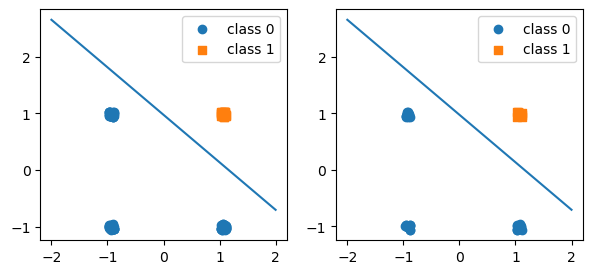

In [22]:
w, b = ppn.weights, ppn.bias

# x1w1 + x2w2 + b = 0 if we wanted to draw this then change this into y= ax+b
x_min = -2
y_min = ((-(w[0]*x_min)-b[0])/w[1]) # finding x2 from the whole above equation as x2 = (-(x1w1)-b)/w2


x_max = 2
y_max = ((-(w[0]*x_max)-b[0])/w[1])


fig, ax = plt.subplots(1, 2, figsize=(7,3))
ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

# For training
ax[0].scatter(X_train[y_train ==0,0], X_train[y_train ==0,1], label="class 0", marker = 'o')
ax[0].scatter(X_train[y_train ==1,0], X_train[y_train ==1,1], label="class 1", marker = 's')

# For Testing
ax[1].scatter(X_test[y_test ==0,0], X_test[y_test ==0,1], label="class 0", marker = 'o')
ax[1].scatter(X_test[y_test ==1,0], X_test[y_test ==1,1], label="class 1", marker = 's')

ax[1].legend()
ax[0].legend()